In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn import metrics as sm
%matplotlib inline
plt.style.use('seaborn-white')

### Organising Data

In [2]:
#importing Dataset
df1 = pd.read_csv('heart_failure_clinical_records.csv')

In [3]:
#printing Dataset
df1

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [4]:
#checking for null values
df1.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

###### No Null Values found

In [5]:
#description of dataset  
df1.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [6]:
df1.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

### Starting EDA 

In [7]:
dfoutliers = df1[['serum_creatinine','platelets','ejection_fraction','creatinine_phosphokinase','serum_sodium']]
dfoutliers.head(1)
#dfoutliers for making boxplots

,serum_creatinine,platelets,ejection_fraction,creatinine_phosphokinase,serum_sodium
0,1.9,265000.0,20,582,130


###### *Found many Outliers

serum_creatinine


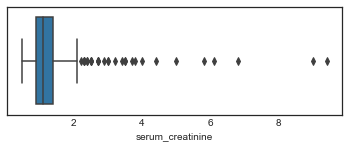

platelets


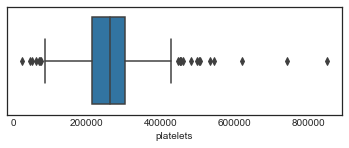

ejection_fraction


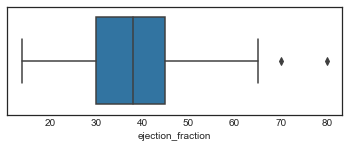

creatinine_phosphokinase


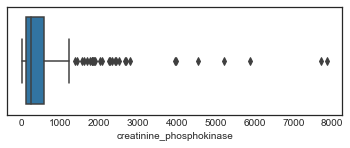

serum_sodium


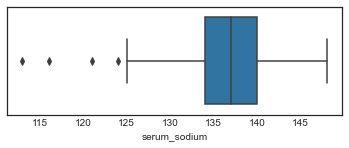

In [8]:
for col in dfoutliers:
    print(col)
    
    plt.figure(figsize=(6,2))
    sns.boxplot(x=dfoutliers[col])
    plt.show()

######  *Removing Outliers

In [9]:
q1=df1.quantile(0.25)
q3=df1.quantile(0.75)
q1,q3
IQR =q3-q1
IQR

age                            19.0
anaemia                         1.0
creatinine_phosphokinase      465.5
diabetes                        1.0
ejection_fraction              15.0
high_blood_pressure             1.0
platelets                   91000.0
serum_creatinine                0.5
serum_sodium                    6.0
sex                             1.0
smoking                         1.0
time                          130.0
DEATH_EVENT                     1.0
dtype: float64

In [10]:
ll=q1-1.5*IQR
ul=q3+1.5*IQR
ll,ul

(age                            22.50
 anaemia                        -1.50
 creatinine_phosphokinase     -581.75
 diabetes                       -1.50
 ejection_fraction               7.50
 high_blood_pressure            -1.50
 platelets                   76000.00
 serum_creatinine                0.15
 serum_sodium                  125.00
 sex                            -1.50
 smoking                        -1.50
 time                         -122.00
 DEATH_EVENT                    -1.50
 dtype: float64,
 age                             98.50
 anaemia                          2.50
 creatinine_phosphokinase      1280.25
 diabetes                         2.50
 ejection_fraction               67.50
 high_blood_pressure              2.50
 platelets                   440000.00
 serum_creatinine                 2.15
 serum_sodium                   149.00
 sex                              2.50
 smoking                          2.50
 time                           398.00
 DEATH_EVENT         

In [11]:
print(df1 < (q1 - 1.5 * IQR)) | (df1 > (q3 + 1.5 * IQR))

       age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    False    False                     False     False              False   
1    False    False                     False     False              False   
2    False    False                     False     False              False   
3    False    False                     False     False              False   
4    False    False                     False     False              False   
..     ...      ...                       ...       ...                ...   
294  False    False                     False     False              False   
295  False    False                     False     False              False   
296  False    False                     False     False              False   
297  False    False                     False     False              False   
298  False    False                     False     False              False   

     high_blood_pressure  platelets  serum_creatinine  serum_so

TypeError: Cannot perform 'ror_' with a dtyped [bool] array and scalar of type [NoneType]

In [12]:
df2 = df1[~((df1 < (q1 - 1.5 * IQR)) |(df1 > (q3 + 1.5 * IQR))).any(axis=1)]
df2.shape

(224, 13)

In [13]:
#separating DEATH_EVENT as target variable as tar
target=df2.iloc[:,12]
target

0      1
2      1
3      1
5      1
6      1
      ..
291    0
292    0
293    0
294    0
298    0
Name: DEATH_EVENT, Length: 224, dtype: int64

In [14]:
#storing rest of data
df=df2.drop(['DEATH_EVENT'], axis =1)

In [15]:
#storing rest of data


In [16]:
#From 13 columns to 12 now, as DEATH_EVENT is removed
df.shape

(224, 12)

In [17]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.0,1.9,130,1,0,4
2,65.0,0,146,0,20,0,162000.0,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.0,1.9,137,1,0,7
5,90.0,1,47,0,40,1,204000.0,2.1,132,1,1,8
6,75.0,1,246,0,15,0,127000.0,1.2,137,1,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...
291,60.0,0,320,0,35,0,133000.0,1.4,139,1,0,258
292,52.0,0,190,1,38,0,382000.0,1.0,140,1,1,258
293,63.0,1,103,1,35,0,179000.0,0.9,136,1,1,270
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270


{'whiskers': [<matplotlib.lines.Line2D at 0x27ceb0f4c10>,
 'caps': [<matplotlib.lines.Line2D at 0x27ceb104370>,
 'boxes': [<matplotlib.lines.Line2D at 0x27ceb0f4880>],
 'medians': [<matplotlib.lines.Line2D at 0x27ceb104a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x27ceb104e20>],
 'means': []}

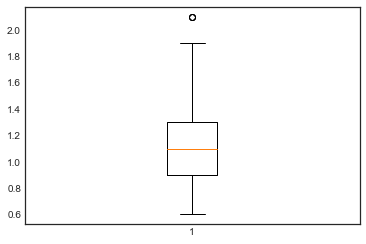

In [18]:
#difference before outlier removal vs now
plt.boxplot(df2.serum_creatinine)

###### *The outliers are all removed

###### *Checking for Skewness

In [19]:
#'age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
#'ejection_fraction', 'high_blood_pressure', 'platelets',
#'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'],


In [20]:
#plt.hist(df.serum_sodium)

In [21]:
#plt.hist(df.creatinine_phosphokinase)

In [22]:
#plt.hist(df.serum_creatinine)

age
0.3719365605846258


C:\Users\itsas\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


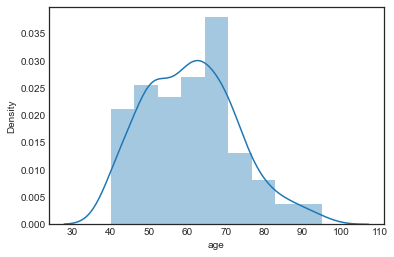

anaemia
0.1252448582170299


C:\Users\itsas\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


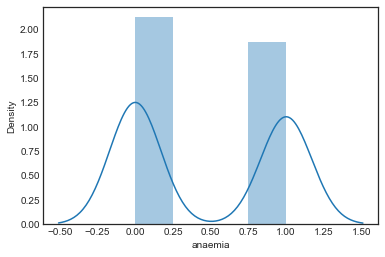

creatinine_phosphokinase
0.9662909748048518


C:\Users\itsas\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


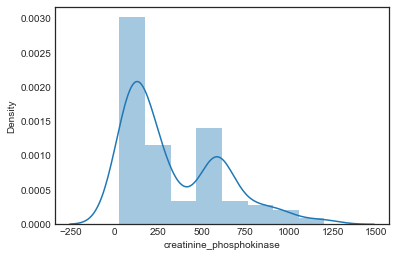

diabetes
0.32566185911337275


C:\Users\itsas\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


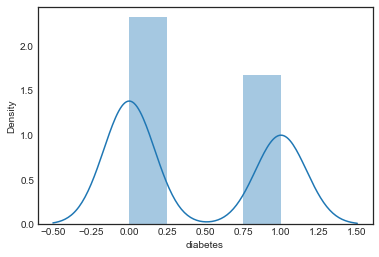

ejection_fraction
0.3799447976892925


C:\Users\itsas\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


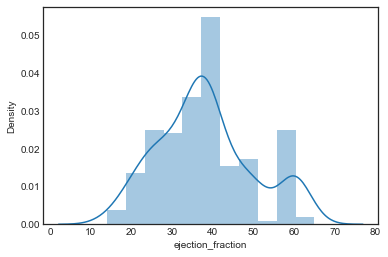

high_blood_pressure
0.4967946346469188


C:\Users\itsas\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


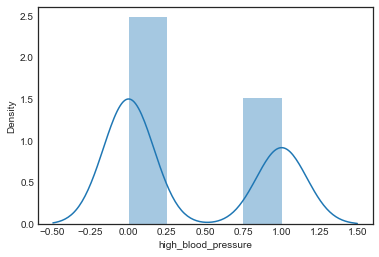

platelets
0.24464293574765553


C:\Users\itsas\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


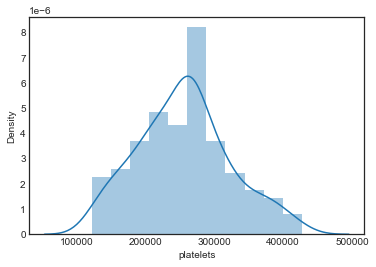

serum_creatinine
0.9339689934017914


C:\Users\itsas\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


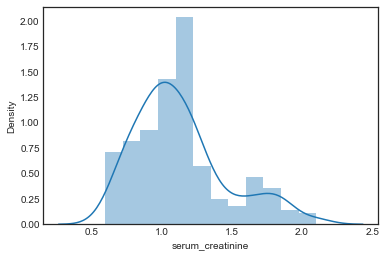

serum_sodium
-0.10923871146321126


C:\Users\itsas\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


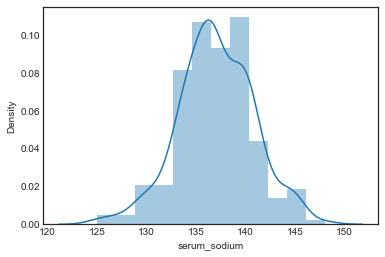

sex
-0.5962847939999444


C:\Users\itsas\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


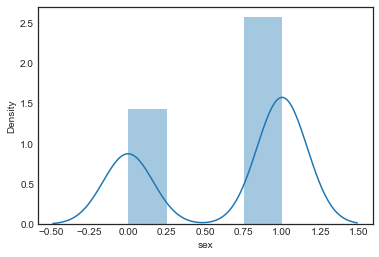

C:\Users\itsas\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


smoking
0.7647191129018727


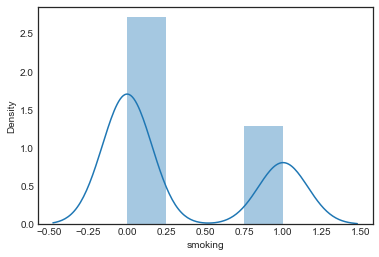

time
0.06258436206066467


C:\Users\itsas\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


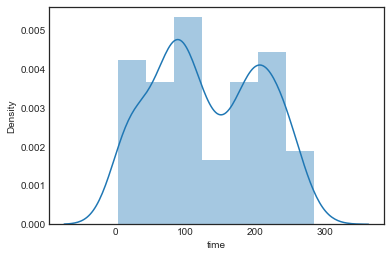

In [23]:
for col in df:
    print(col)
    print(skew(df[col]))
    
    plt.figure()
    sns.distplot(df[col])
    plt.show()

###### * smoking, serum_creatinine and creatinine_phosphokinase has high skewness. Hence need to be resolved 

In [24]:
plt.figure(figsize = (12,10))
#sns.heatmap(df.corr(), annot = True)
plt.show()

<Figure size 864x720 with 0 Axes>

In [25]:
df["creatinine_phosphokinase"] = np.sqrt(df["creatinine_phosphokinase"])
skew(df["creatinine_phosphokinase"])

0.4848714349742609

In [26]:
df["serum_creatinine"] = np.sqrt(df["serum_creatinine"])
skew(df["serum_creatinine"])

0.6219974641788938

In [27]:
df["smoking"] = np.sqrt(df["smoking"])
skew(df["smoking"])

0.7647191129018727

In [28]:
#sns.pairplot(df)

In [29]:
#Removeing labels by deleting top row
df.columns = ['0', '1','3','4','5','6','7','8','9','10','11','12']
df.head(1)

,0,1,3,4,5,6,7,8,9,10,11,12
0,75.0,0,24.124676,0,20,1,265000.0,1.378405,130,1,0.0,4


In [30]:
#target1= pd.DataFrame([tar])
target  #get1

0      1
2      1
3      1
5      1
6      1
      ..
291    0
292    0
293    0
294    0
298    0
Name: DEATH_EVENT, Length: 224, dtype: int64

In [31]:
#transposing and removing header
#target=target1.transpose()
#target.columns = ['0']

In [32]:
target.head()

0    1
2    1
3    1
5    1
6    1
Name: DEATH_EVENT, dtype: int64

###### *Starting Classification (Logistics Regression)

In [33]:
df_s=scale(df)#Standard Normalization --> Mean to 0 & SD TO 1
df_s

array([[ 1.19053689, -0.93933644,  0.9909225 , ...,  0.74535599,
        -0.6882472 , -1.68373345],
       [ 0.35156776, -0.93933644, -0.63889308, ...,  0.74535599,
         1.45296631, -1.64447087],
       [-0.90688592,  1.06458129, -0.84833017, ...,  0.74535599,
        -0.6882472 , -1.64447087],
       ...,
       [ 0.18377394,  1.06458129, -0.90067782, ...,  0.74535599,
         1.45296631,  1.79754817],
       [ 0.09987703, -0.93933644, -1.2172093 , ...,  0.74535599,
         1.45296631,  1.79754817],
       [-0.90688592, -0.93933644, -0.37943639, ...,  0.74535599,
         1.45296631,  1.99386105]])

In [34]:
df_train,df_test,target_train,target_test=train_test_split(df_s,target,test_size=0.2,random_state=15)
df_train.shape,df_test.shape,target_train.shape,target_test.shape

((179, 12), (45, 12), (179,), (45,))

In [35]:
logR=LogisticRegression().fit(df_train,target_train)
logR

LogisticRegression()

In [36]:
logR.predict_proba(df_test) #shows probability values

array([[0.88014257, 0.11985743],
       [0.83438705, 0.16561295],
       [0.93088041, 0.06911959],
       [0.4002987 , 0.5997013 ],
       [0.11300801, 0.88699199],
       [0.98161196, 0.01838804],
       [0.99206589, 0.00793411],
       [0.93638782, 0.06361218],
       [0.96589642, 0.03410358],
       [0.99719779, 0.00280221],
       [0.9079006 , 0.0920994 ],
       [0.76110852, 0.23889148],
       [0.98509756, 0.01490244],
       [0.77418475, 0.22581525],
       [0.96236307, 0.03763693],
       [0.64062941, 0.35937059],
       [0.69181304, 0.30818696],
       [0.95897063, 0.04102937],
       [0.78527689, 0.21472311],
       [0.96307321, 0.03692679],
       [0.99871299, 0.00128701],
       [0.12334332, 0.87665668],
       [0.98842263, 0.01157737],
       [0.94117168, 0.05882832],
       [0.99399083, 0.00600917],
       [0.97733371, 0.02266629],
       [0.75875628, 0.24124372],
       [0.99195843, 0.00804157],
       [0.80151197, 0.19848803],
       [0.9885705 , 0.0114295 ],
       [0.

In [37]:
print(logR.intercept_)

[-1.63131723]


In [38]:
print(logR.coef_)

[[ 0.54654191  0.24494011  0.14899201 -0.08800359 -0.82787364 -0.06096111
   0.04009332  0.76579666 -0.11561574 -0.30751624  0.23698548 -1.43710867]]


In [39]:
pred=logR.predict(df_test)
pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0], dtype=int64)

In [40]:
#For Contingency table first create a dataframe with respective Columns
values = pd.DataFrame({'actual': target_test, 'predictions': pred}) 
values

,actual,predictions
233,0,0
169,0,0
289,0,0
27,1,1
51,1,1
242,0,0
263,0,0
225,0,0
180,0,0
259,0,0


In [41]:
#Count of each combination --> Contingency Table
ct = pd.crosstab(values['actual'], values['predictions'])
ct

predictions,0,1
actual,,
0,35,2
1,1,7


In [42]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score

In [43]:
accuracy=sm.accuracy_score(target_test,pred)

In [44]:
f1 = f1_score(target_test, pred)

In [45]:
precision = precision_score(target_test, pred)

In [46]:
recall = recall_score(target_test, pred)

In [47]:
print('Accuracy is  :' ,accuracy)
print('F1 score is :' ,f1)
print('Precision is  :',precision)
print('Recall is  :',recall)

Accuracy is  : 0.9333333333333333
F1 score is : 0.823529411764706
Precision is  : 0.7777777777777778
Recall is  : 0.875


#### Starting KNN Clasification :

In [48]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn import metrics as sm

In [49]:
df_train,df_test,target_train,target_test=train_test_split(df,target,test_size=0.2,random_state=15)
df_train.shape,df_test.shape,target_train.shape,target_test.shape

((179, 12), (45, 12), (179,), (45,))

In [54]:
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=15)
#X_train.shape,X_test.shape,y_train.shape,y_test.shape
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
pred1 = knn.fit(df_train, target_train).predict(df_test)
pred1

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=int64)

In [61]:
val = pd.DataFrame({'actual': target_test, 'predictions': pred1}) 
val

,actual,predictions
233,0,0
169,0,0
289,0,0
27,1,0
51,1,0
242,0,0
263,0,1
225,0,1
180,0,0
259,0,1


In [58]:
print(confusion_matrix(target_test, pred1).T)

[[31  8]
 [ 6  0]]


In [59]:
print(classification_report(target_test, pred1, digits=3))

              precision    recall  f1-score   support

           0      0.795     0.838     0.816        37
           1      0.000     0.000     0.000         8

    accuracy                          0.689        45
   macro avg      0.397     0.419     0.408        45
weighted avg      0.654     0.689     0.671        45



In [60]:
#Logistics Regression vs KNN
print('Logistics Regression')
print('Accuracy is  :' ,accuracy)
print('F1 score is :' ,f1)
print('Precision is  :',precision)
print('Recall is  :',recall)
print('KNN')
print(classification_report(target_test, pred1, digits=3))

Logistics Regression
Accuracy is  : 0.9333333333333333
F1 score is : 0.823529411764706
Precision is  : 0.7777777777777778
Recall is  : 0.875
KNN
              precision    recall  f1-score   support

           0      0.795     0.838     0.816        37
           1      0.000     0.000     0.000         8

    accuracy                          0.689        45
   macro avg      0.397     0.419     0.408        45
weighted avg      0.654     0.689     0.671        45



### Logistics Regression and KNN both are almost same in terms of Accuracy.